In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
R = np.linspace(0.1,17.,100)

In [4]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

Text(0.5,1,'Bulge')

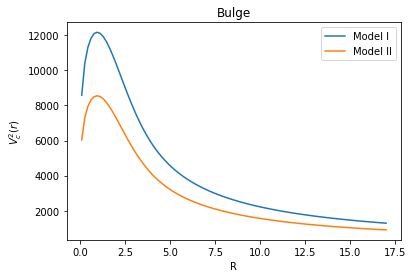

In [10]:
plt.plot(R,Vc2_b(R,rho_b=rho_b_I),label='Model I')
plt.plot(R,Vc2_b(R,rho_b=rho_b_II),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Bulge')

In [5]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return 4.*np.pi*G*q_h*rho_h*np.array(Integral_DM)

Text(0.5,1,'DM Halo')

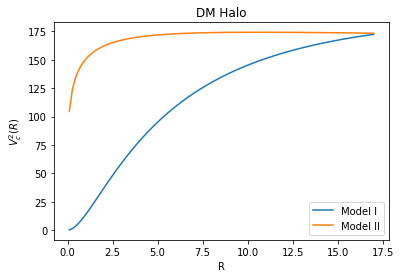

In [6]:
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II)),label='Model II')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.title('DM Halo')

In [11]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

Text(0.5,1,'Stelar Disk')

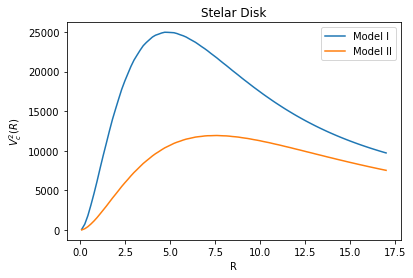

In [14]:
plt.plot(R,Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I),label='Model I')
plt.plot(R,Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II),label='Model II')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.xlabel('R')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Stelar Disk')

In [86]:
def Vc2_ISM_sims(R,Sigma_g_ISM,R_g,R_m):
    def Integral_ISM(s,h,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
        t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
        result = t1*t2*t3*t4
        return R**2.*result
    s_lims = np.linspace(0.0001,0.999,len(R))#100
    h_lims = np.linspace(1.001,10.0,6*len(R))#600
    fun_s = np.zeros(len(s_lims))
    Integral_ISM_sims = []
    for k in range(0,len(R)):
        for i in range(0,len(s_lims)):
            fun_s[i] = integrate.simps(Integral_ISM(s_lims[i],h_lims,R[k]),h_lims)
        result = integrate.simps(fun_s,s_lims)
        Integral_ISM_sims.append(result)
    tmp=-4.*np.pi*G*Sigma_g_ISM*np.array(Integral_ISM_sims)/R_g
    w=tmp<0
    tmp[w]=0
    return tmp

Text(0.5,1,'Interestelar Medium')

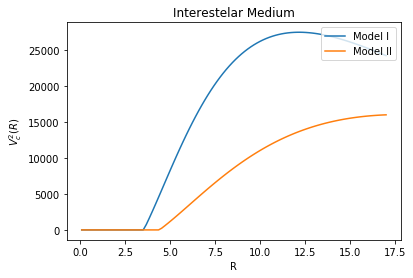

In [87]:
plt.plot(R,Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_I,R_g=2.*R_d_I,R_m=R_m),label='Model I')
plt.plot(R,Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_II,R_g=2.*R_d_II,R_m=R_m),label='Model II')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.xlabel('R')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Interestelar Medium')

Text(0.5,1,'Model I')

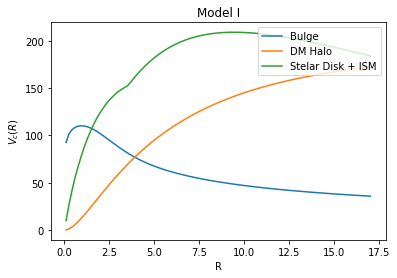

In [93]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I) + Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_I,R_g=2.*R_d_I,R_m=R_m)),label='Stelar Disk + ISM')
plt.ylabel(r'$V_{c}(R)$')
plt.xlabel('R')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Model I')

Text(0.5,1,'Model II')

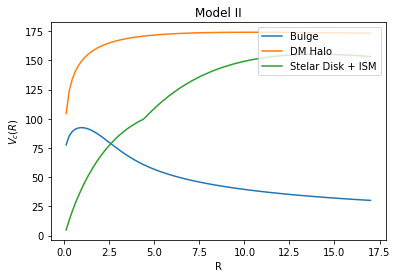

In [94]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II) + Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_II,R_g=2.*R_d_II,R_m=R_m)),label='Stelar Disk + ISM')
plt.ylabel(r'$V_{c}(R)$')
plt.xlabel('R')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Model II')

In [88]:
def Vc_total(R,parameters):
    rho_b,a_h,rho_h,alpha_h,beta_h,R_d,Sigma_d_SD,Sigma_g_ISM,R_g,R_m = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM_sims(R,Sigma_g_ISM,R_g,R_m)
    return np.sqrt(suma)

In [89]:
params_MI = np.array([rho_b_I,a_h_I,rho_h_I,alpha_h_I,beta_h_I,R_d_I,Sigma_d_SD_I,Sigma_g_ISM_I,2.*R_d_I,R_m])
params_MII = np.array([rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,R_d_II,Sigma_d_SD_II,Sigma_g_ISM_II,2.*R_d_II,R_m])

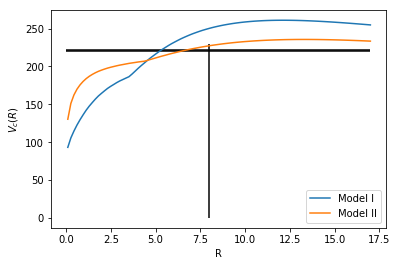

In [90]:
plt.plot(R,Vc_total(R,params_MI),label='Model I')
plt.plot(R,Vc_total(R,params_MII),label='Model II')
plt.hlines(220,0,17)
plt.hlines(222,0,17)
plt.vlines(8,0,230)
plt.ylabel(r'$V_{c}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})

Text(0.5,1,'Model I')

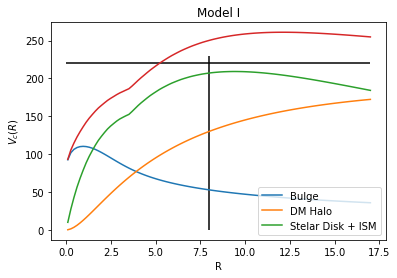

In [91]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I) + Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_I,R_g=2.*R_d_I,R_m=R_m)),label='Stelar Disk + ISM')
plt.plot(R,Vc_total(R,params_MI))
plt.hlines(220,0,17)
plt.vlines(8,0,230)
plt.ylabel(r'$V_{c}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.title('Model I')

Text(0.5,1,'Model II')

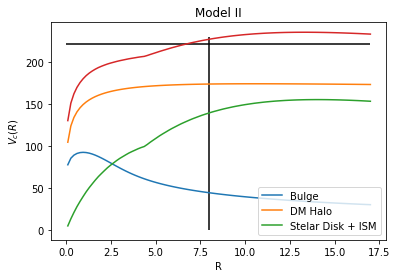

In [92]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II) + Vc2_ISM_sims(R,Sigma_g_ISM=Sigma_g_ISM_II,R_g=2.*R_d_II,R_m=R_m)),label='Stelar Disk + ISM')
plt.plot(R,Vc_total(R,params_MII))
plt.hlines(222,0,17)
plt.vlines(8,0,230)
plt.ylabel(r'$V_{c}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.title('Model II')

Note: $R_{g} \neq 2R_{d}$, $R_{g} \equiv R_{d}$

In [49]:
def Mass(R,params):
    return R*Vc_total(R,params)**2./G

In [57]:
R_mass = np.linspace(0.1,150,100)

Text(0.5,1,'Mass')

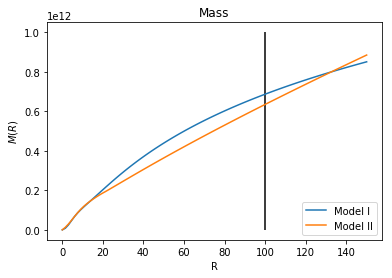

In [60]:
plt.plot(R_mass,Mass(R_mass,params_MI),label='Model I')
plt.plot(R_mass,Mass(R_mass,params_MII),label='Model II')
plt.vlines(100,0,1.0e12)
#plt.yscale('log')
plt.ylabel(r'$M(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.title('Mass')

In [56]:
print Mass(np.array([99.9]),params_MI),Mass(np.array([99.9]),params_MII)

[6.38653493e+11] [5.97001952e+11]


In [61]:
def Sigma_ISM(R,Sigma_g,R_g,R_m):
    return Sigma_g*np.exp(-R/R_g -R_m/R)
def Sigma_SD(R,Sigma_d,R_d):
    return Sigma_d*np.exp(-R/R_d)

In [64]:
print Sigma_ISM(1.1,Sigma_g=1905.*0.25,R_g=R_d_I,R_m=R_m),Sigma_ISM(1.1,Sigma_g=536.*0.25,R_g=R_d_II,R_m=R_m)

7.239696532200831 2.503591156095853


In [65]:
print Sigma_SD(1.1,Sigma_d=1905.*0.75,R_d=R_d_I),Sigma_SD(1.1,Sigma_d=536.*0.75,R_d=R_d_II)

824.3170415811203 285.06068533983415
